<a href="https://colab.research.google.com/github/ravi-gopalan/DAND_Data_Wrangling/blob/master/ashrae_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
cd /root

/root


In [0]:
!mkdir .kaggle 

In [0]:
!cp '/gdrive/My Drive/Colab_stuff/kaggle.json' '/root/.kaggle/kaggle.json' 
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
cd /content/ 

/content


In [0]:
!mkdir ashrae_energy_prediction

In [7]:
cd ashrae_energy_prediction/

/content/ashrae_energy_prediction


In [8]:
!kaggle competitions download -c ashrae-energy-prediction

 90% 108M/120M [00:01<00:00, 93.2MB/s] 
100% 120M/120M [00:01<00:00, 112MB/s] 
  0% 0.00/44.5k [00:00<?, ?B/s]
100% 44.5k/44.5k [00:00<00:00, 37.1MB/s]
 89% 79.0M/88.4M [00:00<00:00, 145MB/s]
100% 88.4M/88.4M [00:00<00:00, 151MB/s]
  0% 0.00/1.27M [00:00<?, ?B/s]
100% 1.27M/1.27M [00:00<00:00, 84.8MB/s]
  0% 0.00/2.53M [00:00<?, ?B/s]
100% 2.53M/2.53M [00:00<00:00, 169MB/s]
 93% 155M/167M [00:01<00:00, 82.7MB/s]
100% 167M/167M [00:01<00:00, 102MB/s] 


In [9]:
!ls

building_metadata.csv	   test.csv.zip   weather_test.csv.zip
sample_submission.csv.zip  train.csv.zip  weather_train.csv.zip


In [10]:
!unzip train.csv.zip
!unzip test.csv.zip
!unzip weather_train.csv.zip
!unzip weather_test.csv.zip
!unzip sample_submission.csv.zip


Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  weather_train.csv.zip
  inflating: weather_train.csv       
Archive:  weather_test.csv.zip
  inflating: weather_test.csv        
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [11]:
!ls

building_metadata.csv	   test.csv.zip      weather_test.csv.zip
sample_submission.csv	   train.csv	     weather_train.csv
sample_submission.csv.zip  train.csv.zip     weather_train.csv.zip
test.csv		   weather_test.csv


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [15]:
primary_use_map = {'Education':0, \
                   'Lodging/residential':1, \
                   'Office':2,\
                   'Entertainment/public assembly':3,\
                   'Other':4,\
                   'Retail':5,\
                   'Parking':6,\
                   'Public services':7,\
                   'Warehouse/storage':8,\
                   'Food sales and service':9,\
                   'Religious worship':10,\
                   'Healthcare':11,\
                   'Utility':12,\
                   'Technology/science':13,\
                   'Manufacturing/industrial':14,\
                   'Services':15\
                   }

df_building_metadata = pd.read_csv('building_metadata.csv')
df_building_metadata.info()
df_building_metadata.head()

df_building_metadata['use_category'] = df_building_metadata['primary_use'].map(primary_use_map)
df_building_metadata.drop(columns=['primary_use'],inplace=True)
df_building_metadata = reduce_mem_usage(df_building_metadata)
df_building_metadata.info()
df_building_metadata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     675 non-null float64
floor_count    355 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


Mem. usage decreased to  0.02 Mb (74.9% reduction)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id         1449 non-null int8
building_id     1449 non-null int16
square_feet     1449 non-null int32
year_built      675 non-null float16
floor_count     355 non-null float16
use_category    1449 non-null int8
dtypes: float16(2), int16(1), int32(1), int8(2)
memory usage: 17.1 KB


,site_id,building_id,square_feet,year_built,floor_count,use_category
0,0,0,7432,2008.0,NaN,0
1,0,1,2720,2004.0,NaN,0
2,0,2,5376,1991.0,NaN,0
3,0,3,23685,2002.0,NaN,0
4,0,4,116607,1975.0,NaN,0


In [52]:
df_building_metadata[['use_category','floor_count','square_feet']].groupby(['use_category','floor_count'],as_index=False)\
['square_feet'].median()
df_building_metadata[['use_category','floor_count','square_feet']].groupby(['use_category','floor_count'],as_index=False)\
['square_feet'].mean()

,use_category,floor_count,square_feet
0,0,1.0,17050.0
1,0,2.0,28826.0
2,0,3.0,80570.5
3,0,4.0,30613.0
4,0,5.0,53268.0
...,...,...,...
62,13,4.0,33167.0
63,13,5.0,53234.0
64,13,6.0,109263.0
65,14,1.0,3853.0


,use_category,floor_count,square_feet
0,0,1.0,31706.263158
1,0,2.0,58601.628571
2,0,3.0,82093.363636
3,0,4.0,62129.962963
4,0,5.0,97499.928571
...,...,...,...
62,13,4.0,33167.000000
63,13,5.0,53234.000000
64,13,6.0,109263.000000
65,14,1.0,3853.000000


In [63]:
df_building_metadata[['use_category','floor_count','square_feet']].groupby(['use_category','floor_count'],as_index=False)\
['square_feet'].median().query('use_category == 1')
df_building_metadata[['use_category','floor_count','square_feet']].groupby(['use_category','floor_count'],as_index=False)\
['square_feet'].mean().query('use_category == 1')

,use_category,floor_count,square_feet
17,1,1.0,88480.0
18,1,2.0,43749.5
19,1,3.0,15300.5
20,1,4.0,71994.0
21,1,5.0,86959.0
22,1,6.0,27071.0
23,1,7.0,102774.0
24,1,8.0,73915.5
25,1,9.0,56467.0
26,1,10.0,66532.0


,use_category,floor_count,square_feet
17,1,1.0,88480.000000
18,1,2.0,43749.500000
19,1,3.0,15300.500000
20,1,4.0,71994.000000
21,1,5.0,86959.000000
22,1,6.0,27071.000000
23,1,7.0,90797.333333
24,1,8.0,95655.000000
25,1,9.0,56467.000000
26,1,10.0,66532.000000


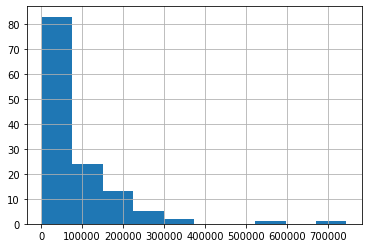

In [62]:
df_building_metadata.query('floor_count != floor_count & use_category == 1')['square_feet'].hist()

In [0]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [17]:
df_train = pd.read_csv('train.csv',parse_dates = ['timestamp'], date_parser = dateparse)
df_train.info()
df_train.head()
df_train = reduce_mem_usage(df_train)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int64
meter            int64
timestamp        datetime64[ns]
meter_reading    float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 616.9 MB


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


Mem. usage decreased to 289.19 Mb (53.1% reduction)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int16
meter            int8
timestamp        datetime64[ns]
meter_reading    float32
dtypes: datetime64[ns](1), float32(1), int16(1), int8(1)
memory usage: 289.2 MB


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [18]:
df_train = df_train.merge(df_building_metadata,on='building_id')
df_train.info()
df_train = reduce_mem_usage(df_train)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 9 columns):
building_id      int16
meter            int8
timestamp        datetime64[ns]
meter_reading    float32
site_id          int8
square_feet      int32
year_built       float16
floor_count      float16
use_category     int8
dtypes: datetime64[ns](1), float16(2), float32(1), int16(1), int32(1), int8(3)
memory usage: 636.2 MB
Mem. usage decreased to 636.23 Mb (0.0% reduction)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 9 columns):
building_id      int16
meter            int8
timestamp        datetime64[ns]
meter_reading    float32
site_id          int8
square_feet      int32
year_built       float16
floor_count      float16
use_category     int8
dtypes: datetime64[ns](1), float16(2), float32(1), int16(1), int32(1), int8(3)
memory usage: 636.2 MB


,building_id,meter,timestamp,meter_reading,site_id,square_feet,year_built,floor_count,use_category
0,0,0,2016-01-01 00:00:00,0.0,0,7432,2008.0,NaN,0
1,0,0,2016-01-01 01:00:00,0.0,0,7432,2008.0,NaN,0
2,0,0,2016-01-01 02:00:00,0.0,0,7432,2008.0,NaN,0
3,0,0,2016-01-01 03:00:00,0.0,0,7432,2008.0,NaN,0
4,0,0,2016-01-01 04:00:00,0.0,0,7432,2008.0,NaN,0


In [19]:
df_train['building_age'] = df_train['timestamp'].dt.year-df_train['year_built']
df_train.drop(columns=['year_built'],inplace=True)
df_train.info()
df_train = reduce_mem_usage(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 9 columns):
building_id      int16
meter            int8
timestamp        datetime64[ns]
meter_reading    float32
site_id          int8
square_feet      int32
floor_count      float16
use_category     int8
building_age     float64
dtypes: datetime64[ns](1), float16(1), float32(1), float64(1), int16(1), int32(1), int8(3)
memory usage: 751.9 MB
Mem. usage decreased to 636.23 Mb (15.4% reduction)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 9 columns):
building_id      int16
meter            int8
timestamp        datetime64[ns]
meter_reading    float32
site_id          int8
square_feet      int32
floor_count      float16
use_category     int8
building_age     float16
dtypes: datetime64[ns](1), float16(2), float32(1), int16(1), int32(1), int8(3)
memory usage: 636.2 MB


In [20]:
df_train.head()

,building_id,meter,timestamp,meter_reading,site_id,square_feet,floor_count,use_category,building_age
0,0,0,2016-01-01 00:00:00,0.0,0,7432,NaN,0,8.0
1,0,0,2016-01-01 01:00:00,0.0,0,7432,NaN,0,8.0
2,0,0,2016-01-01 02:00:00,0.0,0,7432,NaN,0,8.0
3,0,0,2016-01-01 03:00:00,0.0,0,7432,NaN,0,8.0
4,0,0,2016-01-01 04:00:00,0.0,0,7432,NaN,0,8.0


In [21]:
df_weather_train = pd.read_csv('weather_train.csv',parse_dates = ['timestamp'], date_parser = dateparse)
df_weather_train.info()
df_weather_train.head()
df_weather_train.tail()
df_weather_train = reduce_mem_usage(df_weather_train)
df_weather_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null datetime64[ns]
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 9.6 MB


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6
139772,15,2016-12-31 23:00:00,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


Mem. usage decreased to  3.07 Mb (68.1% reduction)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int8
timestamp             139773 non-null datetime64[ns]
air_temperature       139718 non-null float16
cloud_coverage        70600 non-null float16
dew_temperature       139660 non-null float16
precip_depth_1_hr     89484 non-null float16
sea_level_pressure    129155 non-null float16
wind_direction        133505 non-null float16
wind_speed            139469 non-null float16
dtypes: datetime64[ns](1), float16(7), int8(1)
memory usage: 3.1 MB


In [22]:
df_train = df_train.merge(df_weather_train,on=['site_id','timestamp'])
df_train.info()
df_train = reduce_mem_usage(df_train)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20125605 entries, 0 to 20125604
Data columns (total 16 columns):
building_id           int16
meter                 int8
timestamp             datetime64[ns]
meter_reading         float32
site_id               int8
square_feet           int32
floor_count           float16
use_category          int8
building_age          float16
air_temperature       float16
cloud_coverage        float16
dew_temperature       float16
precip_depth_1_hr     float16
sea_level_pressure    float16
wind_direction        float16
wind_speed            float16
dtypes: datetime64[ns](1), float16(9), float32(1), int16(1), int32(1), int8(3)
memory usage: 902.1 MB
Mem. usage decreased to 902.08 Mb (0.0% reduction)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20125605 entries, 0 to 20125604
Data columns (total 16 columns):
building_id           int16
meter                 int8
timestamp             datetime64[ns]
meter_reading         float32
site_id              

,building_id,meter,timestamp,meter_reading,site_id,square_feet,floor_count,use_category,building_age,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,7432,NaN,0,8.0,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01,0.0,0,2720,NaN,0,12.0,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01,0.0,0,5376,NaN,0,25.0,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01,0.0,0,23685,NaN,0,14.0,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01,0.0,0,116607,NaN,0,41.0,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


In [33]:
df_building_metadata['square_feet'].mean()

92111.77639751552

In [26]:
df_train.isna().sum()/df_train.shape[0]

building_id           0.000000
meter                 0.000000
timestamp             0.000000
meter_reading         0.000000
site_id               0.000000
square_feet           0.000000
floor_count           0.826313
use_category          0.000000
building_age          0.601885
air_temperature       0.000306
cloud_coverage        0.434018
dew_temperature       0.000479
precip_depth_1_hr     0.181785
sea_level_pressure    0.056703
wind_direction        0.067504
wind_speed            0.002642
dtype: float64

In [34]:
df_train['meter_per_sf'] = df_train['meter_reading']/df_train['square_feet']
df_train.drop(columns=['meter_reading','square_feet'],inplace=True) 

df_train.info()
df_train = reduce_mem_usage(df_train)
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20125605 entries, 0 to 20125604
Data columns (total 15 columns):
building_id           int16
meter                 int8
timestamp             datetime64[ns]
site_id               int8
floor_count           float16
use_category          int8
building_age          float16
air_temperature       float16
cloud_coverage        float16
dew_temperature       float16
precip_depth_1_hr     float16
sea_level_pressure    float16
wind_direction        float16
wind_speed            float16
meter_per_sf          float32
dtypes: datetime64[ns](1), float16(9), float32(1), int16(1), int8(3)
memory usage: 825.3 MB
Mem. usage decreased to 786.92 Mb (4.7% reduction)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20125605 entries, 0 to 20125604
Data columns (total 15 columns):
building_id           int16
meter                 int8
timestamp             datetime64[ns]
site_id               int8
floor_count           float16
use_category          int8
build

,building_id,meter,timestamp,site_id,floor_count,use_category,building_age,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,meter_per_sf
0,0,0,2016-01-01,0,NaN,0,8.0,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,0.0
1,1,0,2016-01-01,0,NaN,0,12.0,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,0.0
2,2,0,2016-01-01,0,NaN,0,25.0,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,0.0
3,3,0,2016-01-01,0,NaN,0,14.0,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,0.0
4,4,0,2016-01-01,0,NaN,0,41.0,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,0.0


In [64]:
df_train.tail()

,building_id,meter,timestamp,site_id,floor_count,use_category,building_age,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,meter_per_sf
20125600,1400,1,2016-03-24 12:00:00,15,NaN,1,88.0,1.700195,NaN,1.700195,NaN,1017.0,0.0,0.000000,0.000726
20125601,1400,1,2016-03-24 13:00:00,15,NaN,1,88.0,2.800781,NaN,2.199219,NaN,1016.5,320.0,1.500000,0.001185
20125602,1400,1,2016-03-24 14:00:00,15,NaN,1,88.0,5.601562,NaN,4.398438,NaN,1015.0,110.0,2.099609,0.001528
20125603,1400,1,2016-03-24 15:00:00,15,NaN,1,88.0,11.101562,NaN,4.398438,NaN,1014.0,150.0,5.101562,0.001144
20125604,1400,1,2016-03-24 16:00:00,15,NaN,1,88.0,15.000000,4.0,4.398438,NaN,1012.0,160.0,8.203125,0.000772


KeyboardInterrupt: ignored

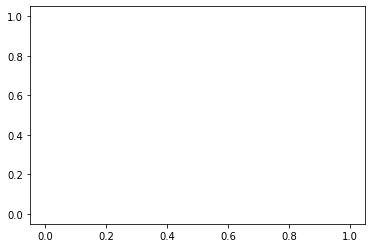

In [76]:
sns.lineplot(data=df_train.query('building_id in [430,431]'),x='timestamp',y='meter_per_sf',hue='meter')



In [19]:
df_test = pd.read_csv('test.csv',parse_dates = ['timestamp'], date_parser = dateparse)
df_test.info()
df_test.drop(columns=['row_id'],inplace=True)
df_test = df_test.merge(df_building_metadata,on='building_id')
df_test = reduce_mem_usage(df_test)
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
row_id         int64
building_id    int64
meter          int64
timestamp      datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.2 GB
Mem. usage decreased to 1153.21 Mb (31.0% reduction)


,building_id,meter,timestamp,site_id,square_feet,year_built,floor_count,use_category
0,0,0,2017-01-01 00:00:00,0,7432,2008.0,NaN,0
1,0,0,2017-01-01 01:00:00,0,7432,2008.0,NaN,0
2,0,0,2017-01-01 02:00:00,0,7432,2008.0,NaN,0
3,0,0,2017-01-01 03:00:00,0,7432,2008.0,NaN,0
4,0,0,2017-01-01 04:00:00,0,7432,2008.0,NaN,0


In [24]:
df_train['building_age'] = df_train['timestamp'].dt.year-df_train['year_built'].astype(int)
df_train.drop(columns=['year_built'],inplace=True)
df_train = reduce_mem_usage(df_train)
df_train.info()

KeyError: ignored

In [0]:
del df_train

In [0]:
del df_test

In [21]:
df_test = reduce_mem_usage(df_test)

Mem. usage decreased to 596.49 Mb (53.1% reduction)


In [22]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int16
meter            int8
timestamp        datetime64[ns]
meter_reading    float32
dtypes: datetime64[ns](1), float32(1), int16(1), int8(1)
memory usage: 289.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
row_id         int32
building_id    int16
meter          int8
timestamp      datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(1), int8(1)
memory usage: 596.5 MB


In [25]:
df_weather_test = pd.read_csv('weather_test.csv',parse_dates = ['timestamp'], date_parser = dateparse)
df_weather_test.info()
df_weather_test.head()
df_weather_test.tail()
df_weather_test = reduce_mem_usage(df_weather_test)
df_weather_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 9 columns):
site_id               277243 non-null int64
timestamp             277243 non-null datetime64[ns]
air_temperature       277139 non-null float64
cloud_coverage        136795 non-null float64
dew_temperature       276916 non-null float64
precip_depth_1_hr     181655 non-null float64
sea_level_pressure    255978 non-null float64
wind_direction        264873 non-null float64
wind_speed            276783 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 19.0 MB


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
277238,15,2018-12-31 19:00:00,3.3,NaN,1.7,NaN,1018.3,150.0,7.7
277239,15,2018-12-31 20:00:00,2.8,NaN,1.1,NaN,1017.8,140.0,5.1
277240,15,2018-12-31 21:00:00,2.8,NaN,1.7,-1.0,1017.2,140.0,6.2
277241,15,2018-12-31 22:00:00,2.8,NaN,2.2,8.0,1016.1,140.0,5.1
277242,15,2018-12-31 23:00:00,3.3,NaN,2.2,20.0,1014.7,140.0,5.1


Mem. usage decreased to  6.08 Mb (68.1% reduction)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 9 columns):
site_id               277243 non-null int8
timestamp             277243 non-null datetime64[ns]
air_temperature       277139 non-null float16
cloud_coverage        136795 non-null float16
dew_temperature       276916 non-null float16
precip_depth_1_hr     181655 non-null float16
sea_level_pressure    255978 non-null float16
wind_direction        264873 non-null float16
wind_speed            276783 non-null float16
dtypes: datetime64[ns](1), float16(7), int8(1)
memory usage: 6.1 MB


In [27]:
df_building_metadata = pd.read_csv('building_metadata.csv')
df_building_metadata.info()
df_building_metadata.head()
df_building_metadata.tail()
df_building_metadata = reduce_mem_usage(df_building_metadata)
df_building_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     675 non-null float64
floor_count    355 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


,site_id,building_id,primary_use,square_feet,year_built,floor_count
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN
1448,15,1448,Office,92271,2001.0,NaN


Mem. usage decreased to  0.03 Mb (60.3% reduction)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id        1449 non-null int8
building_id    1449 non-null int16
primary_use    1449 non-null object
square_feet    1449 non-null int32
year_built     675 non-null float16
floor_count    355 non-null float16
dtypes: float16(2), int16(1), int32(1), int8(1), object(1)
memory usage: 27.0+ KB


In [0]:
df_full.drop(columns='row_id',inplace=True)

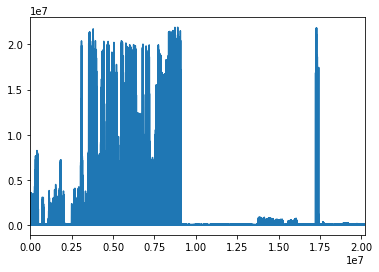

In [32]:
df_train['meter_reading'].plot()

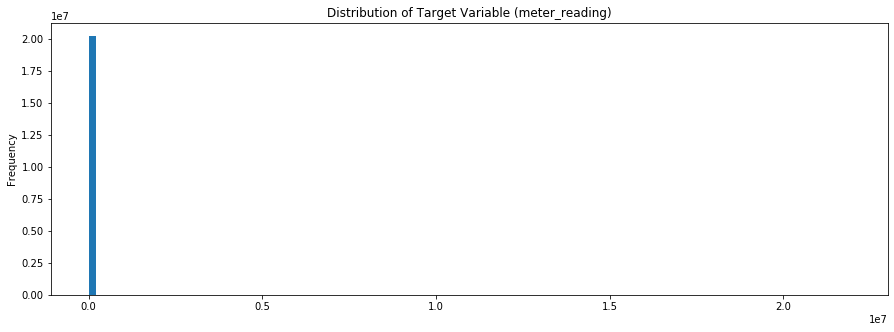

In [34]:
df_train['meter_reading'].plot(kind='hist',
                            bins=100,
                            figsize=(15, 5),
                           title='Distribution of Target Variable (meter_reading)')
plt.show()

In [0]:
# Load data
train = df_train.set_index(['timestamp'])

In [36]:
train


,building_id,meter,meter_reading,train_test
timestamp,,,,
2016-01-01 00:00:00,0,0,0.000000,0
2016-01-01 00:00:00,1,0,0.000000,0
2016-01-01 00:00:00,2,0,0.000000,0
2016-01-01 00:00:00,3,0,0.000000,0
2016-01-01 00:00:00,4,0,0.000000,0
...,...,...,...,...
2016-12-31 23:00:00,1444,0,8.750000,0
2016-12-31 23:00:00,1445,0,4.825000,0
2016-12-31 23:00:00,1446,0,0.000000,0


/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:208: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


Text(0.5, 1.0, 'meter 0')

Text(0.5, 1, 'meter 1')

Text(0.5, 1, 'meter 2')

Text(0.5, 1, 'meter 3')

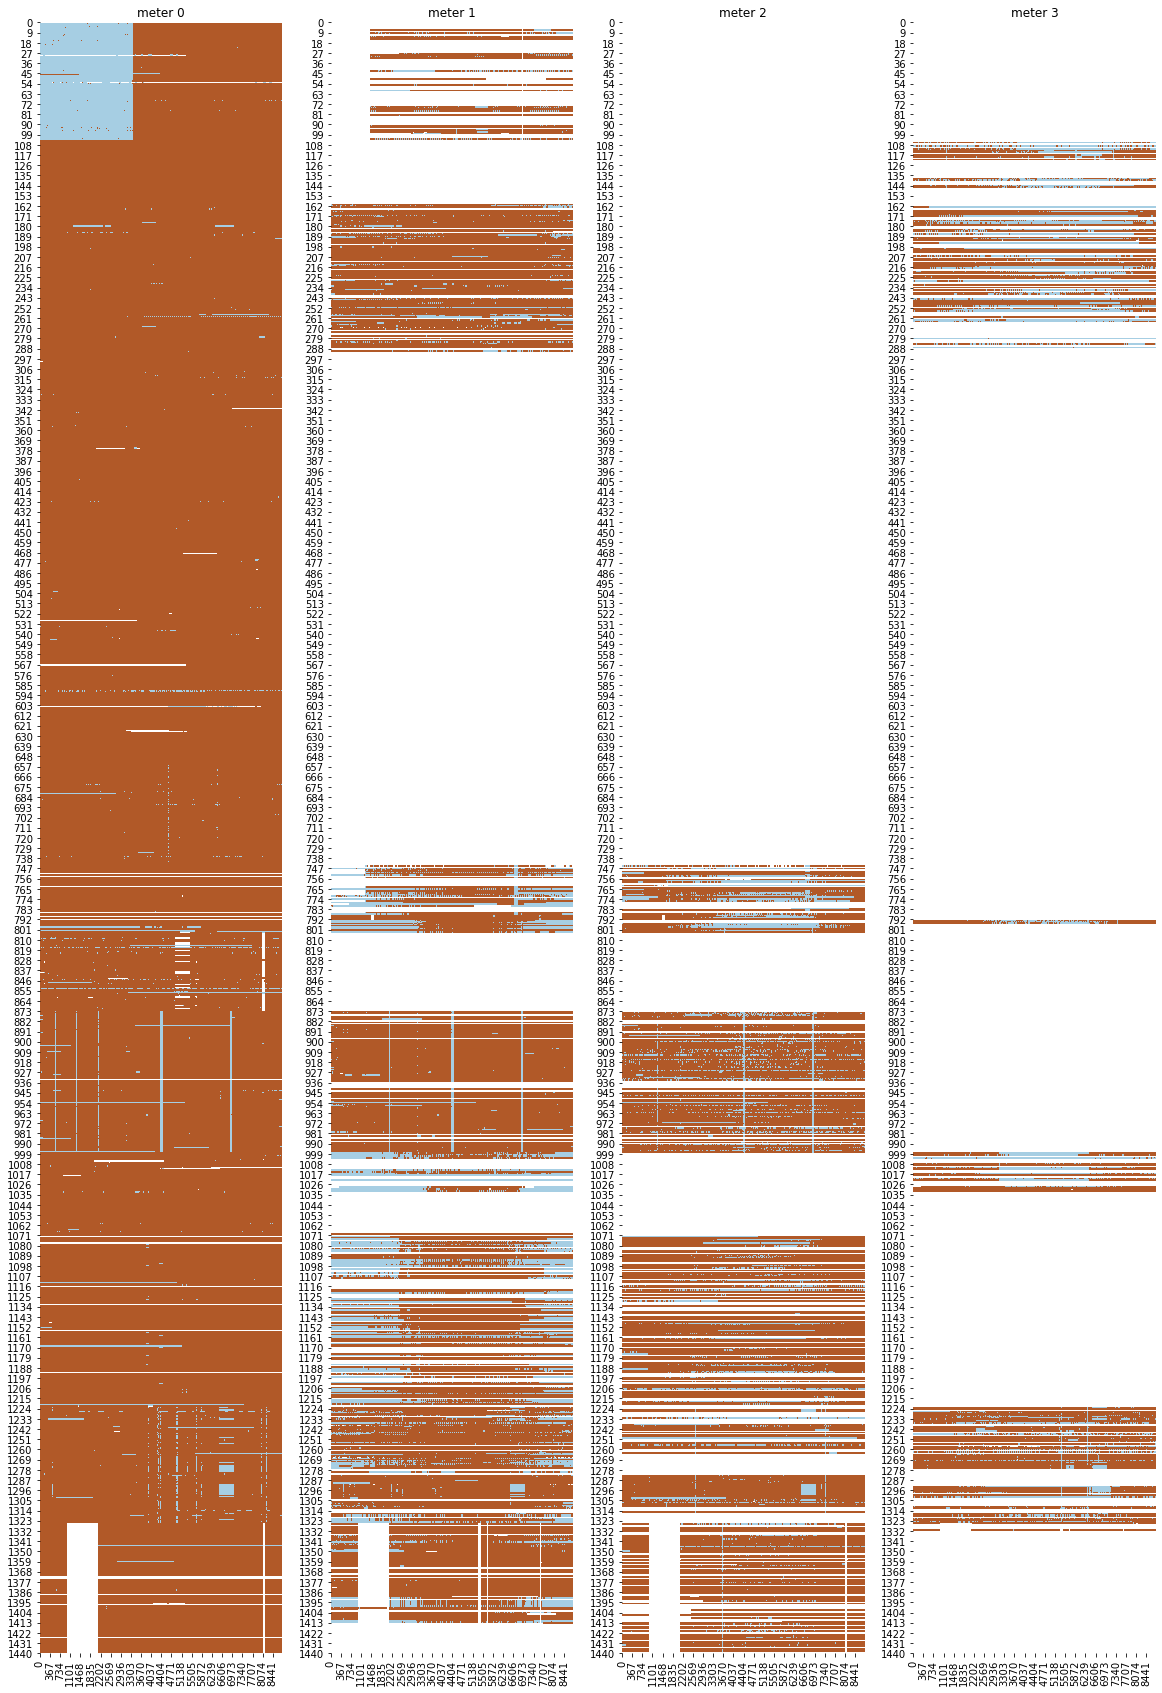

In [37]:
# Plot missing values per building/meter
f,a=plt.subplots(1,4,figsize=(20,30))
for meter in np.arange(4):
    df = train[train.meter==meter].copy().reset_index()
    df['timestamp'] = pd.to_timedelta(df.timestamp).dt.total_seconds() / 3600
    df['timestamp'] = df.timestamp.astype(int)
    df.timestamp -= df.timestamp.min()
    missmap = np.empty((1449, df.timestamp.max()+1))
    missmap.fill(np.nan)
    for l in df.values:
        if l[2]!=meter:continue
        missmap[int(l[1]), int(l[0])] = 0 if l[3]==0 else 1
    a[meter].set_title(f'meter {meter:d}')
    sns.heatmap(missmap, cmap='Paired', ax=a[meter], cbar=False)

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 5 columns):
building_id      int16
meter            int8
timestamp        datetime64[ns]
meter_reading    float32
train_test       int64
dtypes: datetime64[ns](1), float32(1), int16(1), int64(1), int8(1)
memory usage: 443.4 MB


In [0]:
df_792 = df_train.query('building_id == 792')

In [48]:
df_792.query('meter == 1')

,building_id,meter,timestamp,meter_reading,train_test
966,792,1,2016-01-01 00:00:00,381.049988,0
3265,792,1,2016-01-01 01:00:00,401.640015,0
5560,792,1,2016-01-01 02:00:00,373.660004,0
7858,792,1,2016-01-01 03:00:00,388.040009,0
10153,792,1,2016-01-01 04:00:00,390.619995,0
...,...,...,...,...,...
20205290,792,1,2016-12-31 19:00:00,416.369995,0
20207652,792,1,2016-12-31 20:00:00,373.579987,0
20210018,792,1,2016-12-31 21:00:00,446.329987,0
20212384,792,1,2016-12-31 22:00:00,352.769989,0


array([1, 2])

<Figure size 2160x1440 with 0 Axes>

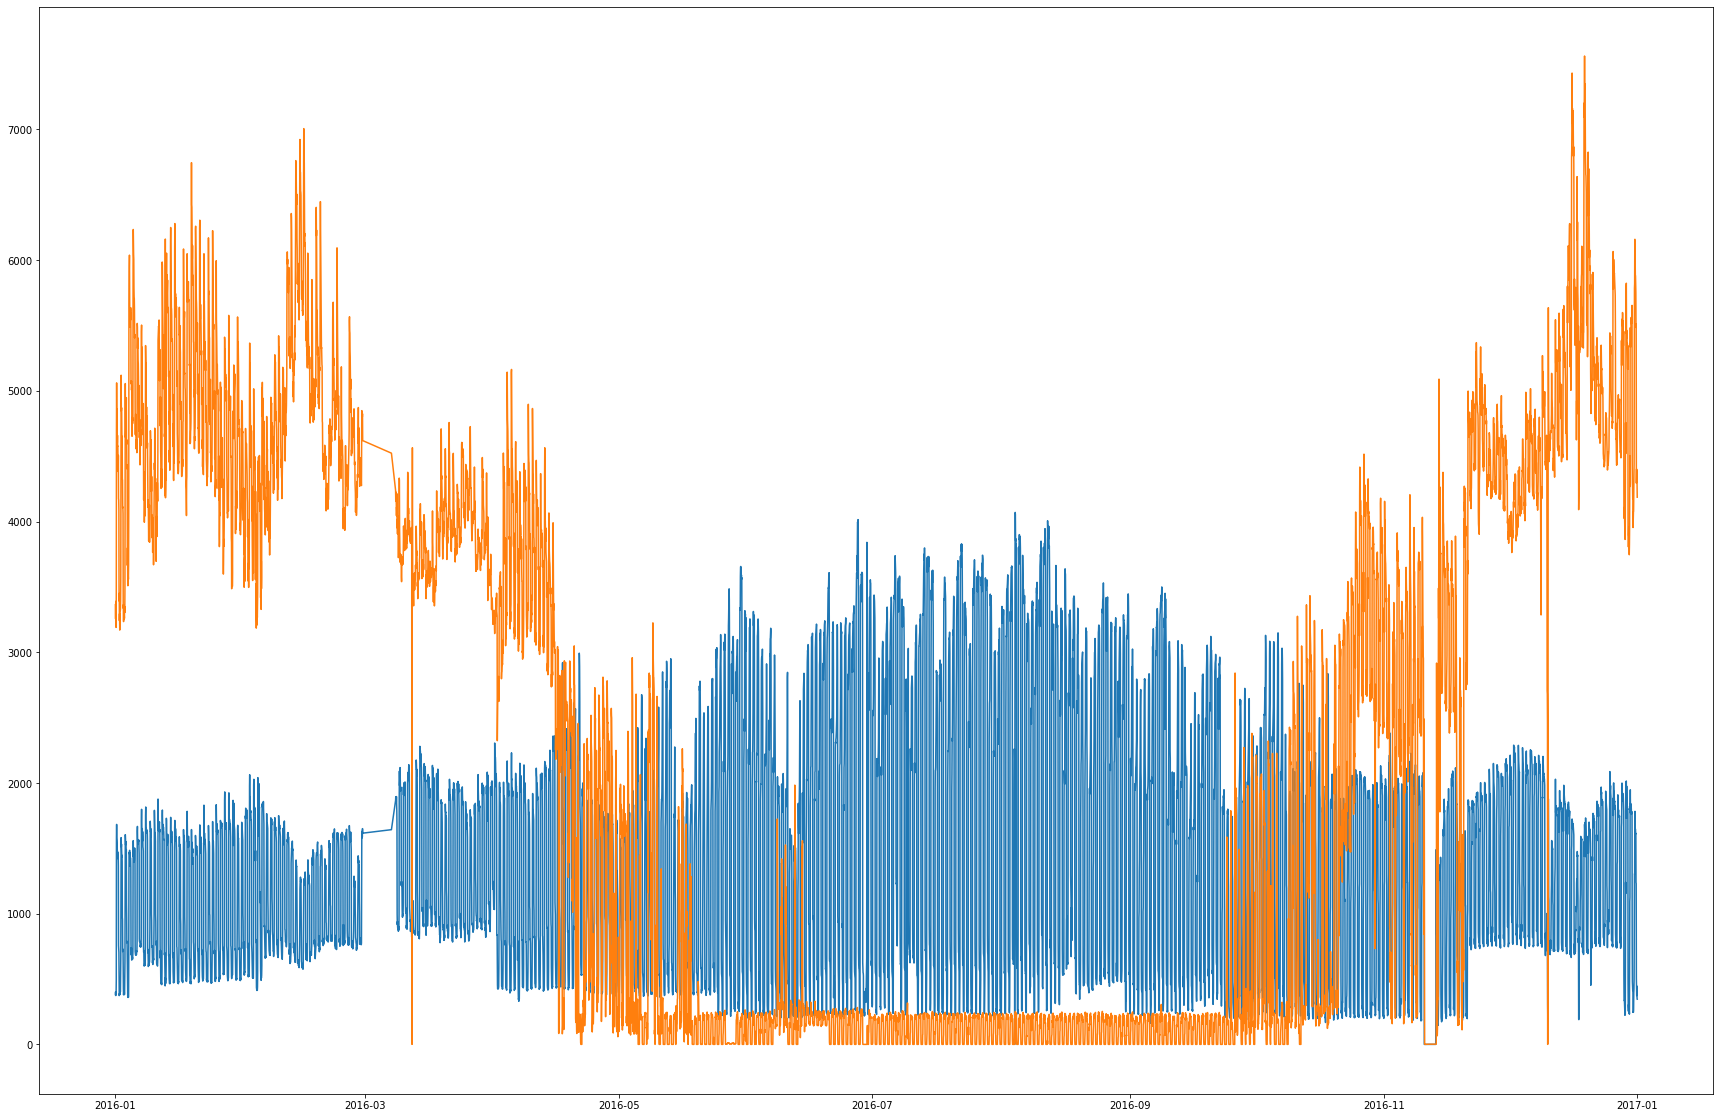

In [54]:
df_792.meter.unique()
plt.figure(figsize=(30,20))
for i in df_792.meter.unique():
  plt.plot(df_792.query('meter == @i')['timestamp'],df_792.query('meter == @i')['meter_reading'])

In [55]:
df_building_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id        1449 non-null int8
building_id    1449 non-null int16
primary_use    1449 non-null object
square_feet    1449 non-null int32
year_built     675 non-null float16
floor_count    355 non-null float16
dtypes: float16(2), int16(1), int32(1), int8(1), object(1)
memory usage: 27.0+ KB


In [56]:
df_building_metadata.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [58]:
df_building_metadata.site_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [59]:
df_building_metadata.primary_use.unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

In [61]:
primary_use_map = {'Education':0, \
                   'Lodging/residential':1, \
                   'Office':2,\
                   'Entertainment/public assembly':3,\
                   'Other':4,\
                   'Retail':5,\
                   'Parking':6,\
                   'Public services':7,\
                   'Warehouse/storage':8,\
                   'Food sales and service':9,\
                   'Religious worship':10,\
                   'Healthcare':11,\
                   'Utility':12,\
                   'Technology/science':13,\
                   'Manufacturing/industrial':14,\
                   'Services':15\
                   }

df_building_metadata['use_category'] = df_building_metadata['primary_use'].map(primary_use_map)
df_building_metadata.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,use_category
0,0,0,Education,7432,2008.0,NaN,0
1,0,1,Education,2720,2004.0,NaN,0
2,0,2,Education,5376,1991.0,NaN,0
3,0,3,Education,23685,2002.0,NaN,0
4,0,4,Education,116607,1975.0,NaN,0


In [63]:
df_building_metadata.head()

,site_id,building_id,square_feet,year_built,floor_count,use_category
0,0,0,7432,2008.0,NaN,0
1,0,1,2720,2004.0,NaN,0
2,0,2,5376,1991.0,NaN,0
3,0,3,23685,2002.0,NaN,0
4,0,4,116607,1975.0,NaN,0


In [0]:
df_train = df_train.merge(df_building_metadata,on='building_id')
df_train.info()
df_train.head()